In [135]:
import pandas as pd

In [144]:
#DATA
series_metadata_path= "/gpfs/data/huo-lab/Image/annawoodard/maicara/data/interim/mammo_v9/series_metadata.pkl"
results = pd.read_csv('/gpfs/data/huo-lab/Image/ojomoleye/projects/mirai_validation/data/cleaned/full_set_supp_toDH.csv')
# sm = pd.read_pickle(series_metadata_path)
# sm = sm[sm['png_path'].notnull()] #drop non-existent png_paths

In [145]:
df = results
df['exam_year'] = pd.DatetimeIndex(df['study_datetime']).year #extract year 


In [146]:
# checking recent exams
recent = df[df['exam_year'] >= 2017]
print('{} exams for {} unique women were taken on or after 2017'.format(recent.exam_id.nunique(), recent.study_id.nunique()))
recent_controls = recent = df[(df['exam_year'] >= 2017) & (df['case'] == False)]

1416 exams for 894 unique women were taken on or after 2017


In [147]:
recent.head()

,Unnamed: 0,exam_id,1_year_risk,2_year_risk,3_year_risk,4_year_risk,5_year_risk,case,years_to_cancer,years_to_last_followup,patient_id,study_datetime,date_dx,date_of_last_contact,study_id,exam_year
4,19,11082929.2O15199,0.001986,0.005769,0.009605,0.014295,0.017879,False,100,2,11082929,2018-09-10 08:21:11,NaN,2021-02-12 00:00:00,11082929,2018
5,25,11082929.2O15200,0.001773,0.004727,0.008122,0.011722,0.014802,False,100,3,11082929,2017-09-06 10:54:47,NaN,2021-02-12 00:00:00,11082929,2017
10,45,11109450.2O03546,0.005606,0.009925,0.015202,0.017709,0.021902,False,100,4,11109450,2017-02-01 09:36:54,NaN,2021-02-11 00:00:00,11109450,2017
11,49,11109450.2O14829,0.003400,0.010019,0.015324,0.020378,0.025003,False,100,3,11109450,2018-02-08 09:25:24,NaN,2021-02-11 00:00:00,11109450,2018
14,61,11317711.2O15771,0.002401,0.007054,0.011383,0.016164,0.020090,False,100,2,11317711,2018-05-24 10:37:45,NaN,2021-02-01 00:00:00,11317711,2018


In [149]:
recent.case.value_counts() # all exams taken on or after 2017 have not yet been diagnosed with cancer

False    1310
Name: case, dtype: int64

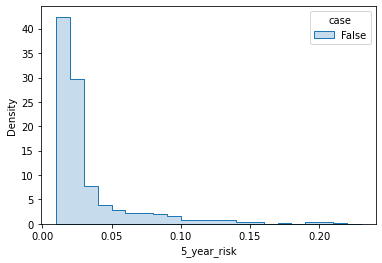

In [148]:
# checking Mirai score distributions for 5_year risk for recent exams
data = recent
import seaborn as sns
import matplotlib as plt
# sns.set()
sns_plot = sns.histplot(data, x= "5_year_risk",stat = 'density', binwidth= 0.01, hue="case", element="step", common_norm=False)
sns_plot.set(title = '')
fig = sns_plot.get_figure()


In [150]:
#take the highest scoring women?
recent['5_year_risk'].describe()

count    1310.000000
mean        0.032897
std         0.031690
min         0.009913
25%         0.015826
50%         0.021740
75%         0.032601
max         0.221475
Name: 5_year_risk, dtype: float64

In [162]:
recent_controls['5_year_risk'].describe()

count    1310.000000
mean        0.032897
std         0.031690
min         0.009913
25%         0.015826
50%         0.021740
75%         0.032601
max         0.221475
Name: 5_year_risk, dtype: float64

In [163]:
recent_high_controls = recent[recent['5_year_risk'] > 0.15] #setting threshold

In [164]:
from utils.metadata_inspect import print_summary, print_summary2
recent_high_controls

,Unnamed: 0,exam_id,1_year_risk,2_year_risk,3_year_risk,4_year_risk,5_year_risk,case,years_to_cancer,years_to_last_followup,patient_id,study_datetime,date_dx,date_of_last_contact,study_id,exam_year
564,2501,14257836.2O15609,0.127603,0.163861,0.162331,0.194844,0.198620,False,100,2,14257836,2018-04-25 15:54:05,NaN,2021-02-08 00:00:00,14257836,2018
753,3347,24988042.2O16192,0.104983,0.138281,0.140479,0.169075,0.174036,False,100,2,24988042,2019-01-15 14:15:59,NaN,2021-02-13 00:00:00,24988042,2019
754,3351,24988042.2O16193,0.091745,0.122772,0.127029,0.153038,0.158759,False,100,3,24988042,2018-01-09 13:51:00,NaN,2021-02-13 00:00:00,24988042,2018
925,4086,29230052.2O14817,0.103435,0.136488,0.138934,0.167238,0.172286,False,100,3,29230052,2017-05-15 11:16:27,NaN,2020-10-02 00:00:00,29230052,2017
926,4090,29230052.2O14818,0.145470,0.183287,0.178742,0.213948,0.216939,False,100,2,29230052,2018-05-18 09:59:09,NaN,2020-10-02 00:00:00,29230052,2018
1232,5386,33252071.2O16504,0.133443,0.170284,0.167771,0.201201,0.204704,False,100,2,33252071,2018-03-22 09:28:14,NaN,2020-12-30 00:00:00,33252071,2018
1364,5971,30138633.2O16488,0.121042,0.156558,0.156126,0.187564,0.191664,False,100,3,30138633,2017-10-23 10:13:32,NaN,2021-02-12 00:00:00,30138633,2017
2485,10906,46812377.2O16241,0.088752,0.119208,0.123910,0.149302,0.155198,False,100,3,46812377,2017-07-12 09:05:46,NaN,2021-02-13 00:00:00,46812377,2017
2562,11238,44350772.2O16069,0.110914,0.145099,0.146338,0.176020,0.180653,False,100,3,44350772,2017-06-14 13:16:59,NaN,2021-02-11 00:00:00,44350772,2017
2597,11403,44558692.2O16570,0.130808,0.167395,0.165326,0.198346,0.201970,False,100,2,44558692,2018-06-25 12:59:36,NaN,2021-02-12 00:00:00,44558692,2018


In [165]:
print_summary(recent_high_controls)

*****AVAILABLE/LOADED***** 
 15 patients 
 0 case exams for 0 cases 
 18 control exams for 15 controls 
 18 total entries
